# STEP 1 : IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV
from time import time
import os
from IPython.display import display

In [2]:
# set the working directory 
import os 
os.getcwd()
os.chdir("F:\\classes\\Python_learning\\Notebooks\\MSR")

In [3]:
# Load the data

dataset = pd.read_csv('F:\\classes\\Python_learning\\Notebooks\\MSR\\default_of_credit_card_clients.csv')
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
# # Skip  rows at specific index the first row skip because esaliy understand the dataset, python zero base index
dataset = pd.read_csv('F:\\classes\\Python_learning\\Notebooks\\MSR\\default_of_credit_card_clients.csv' , skiprows=[0])
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Now lets see how the data looks like
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Checking the last few entries of dataset to see the distribution of data
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
dataset.describe() # statistical view

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Step 2 : Preprocessing & Cleaning of Data

In [8]:
dataset.shape

(30000, 25)

Means there are 30,000 entries with 25 columns

In [9]:
# Checking the object type of all the columns to see if there is not a object type mismatch in any column 
print(dataset.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


From the above output it is clear that there is no object type mismatch in any column.

In [10]:
#Checking the number of Null entries in the data columnwise.
dataset.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

From the above output it is clear that there is no  null values type  in any column.

In [11]:
dataset.info() # dataset information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# STEP 3. Data Visualization & Exploratory Data Analysis

In [12]:
limit_bal = dataset['LIMIT_BAL'].value_counts() #Amount of given credit (includes individual and family/supplementary credit)
limit_bal

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [13]:
dataset.LIMIT_BAL.min() # minimum amount.

10000

In [14]:
dataset.LIMIT_BAL.max() # mximum amount.

1000000

In [15]:
dataset.LIMIT_BAL.mean() # mean of amount or average.

167484.32266666667

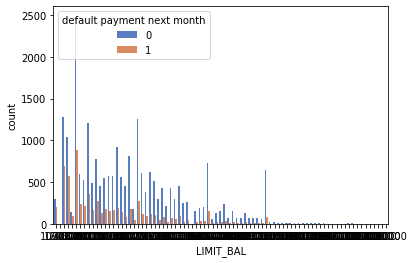

In [16]:
# Checking the number of counts of defaulters and non defaulters sexwise
g=sns.countplot(x="LIMIT_BAL", data=dataset,hue="default payment next month", palette="muted")

In [17]:
# Sex meaning is:

# 1 : male
# 2 : female
dataset.SEX.value_counts() #this is fine, more women than men

2    18112
1    11888
Name: SEX, dtype: int64

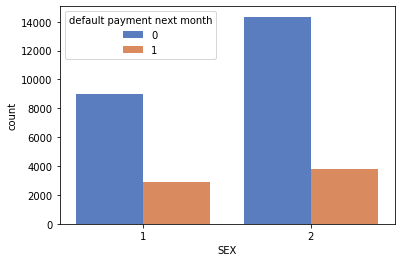

In [18]:
# Checking the number of counts of defaulters and non defaulters sexwise
g=sns.countplot(x="SEX", data=dataset,hue="default payment next month", palette="muted")

It is evident from the above output that females have overall less default payments compare to males

In [19]:
# Education status meaning is:

# 1 : graduate school
# 2 : university
# 3 : high school
# 4 : others
# 5 : unknown
# 6 : unknow
dataset.EDUCATION.value_counts() # Education cloumn 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

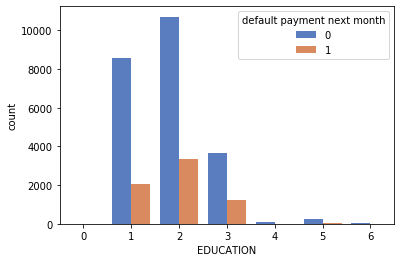

In [20]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="default payment next month", palette="muted")

It is evident from the above output that university persons have overall less default payments compare to males

In [21]:
# Marriage status meaning is:

# 0 : unknown (let's consider as others as well)
# 1 : married
# 2 : single
# 3 : others
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

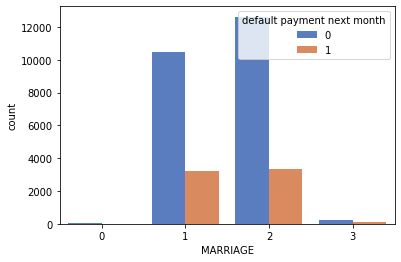

In [22]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="default payment next month", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people.

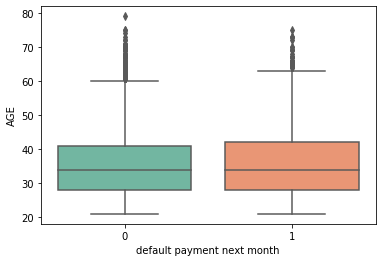

In [23]:
sns.boxplot(x='default payment next month',y='AGE',data=dataset,palette='Set2')

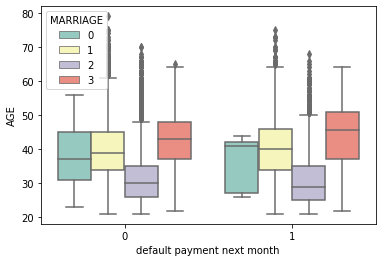

In [24]:
sns.boxplot(x='default payment next month',hue='MARRIAGE', y='AGE',data=dataset,palette="Set3") ## Order to plot the categorical levels by marriage

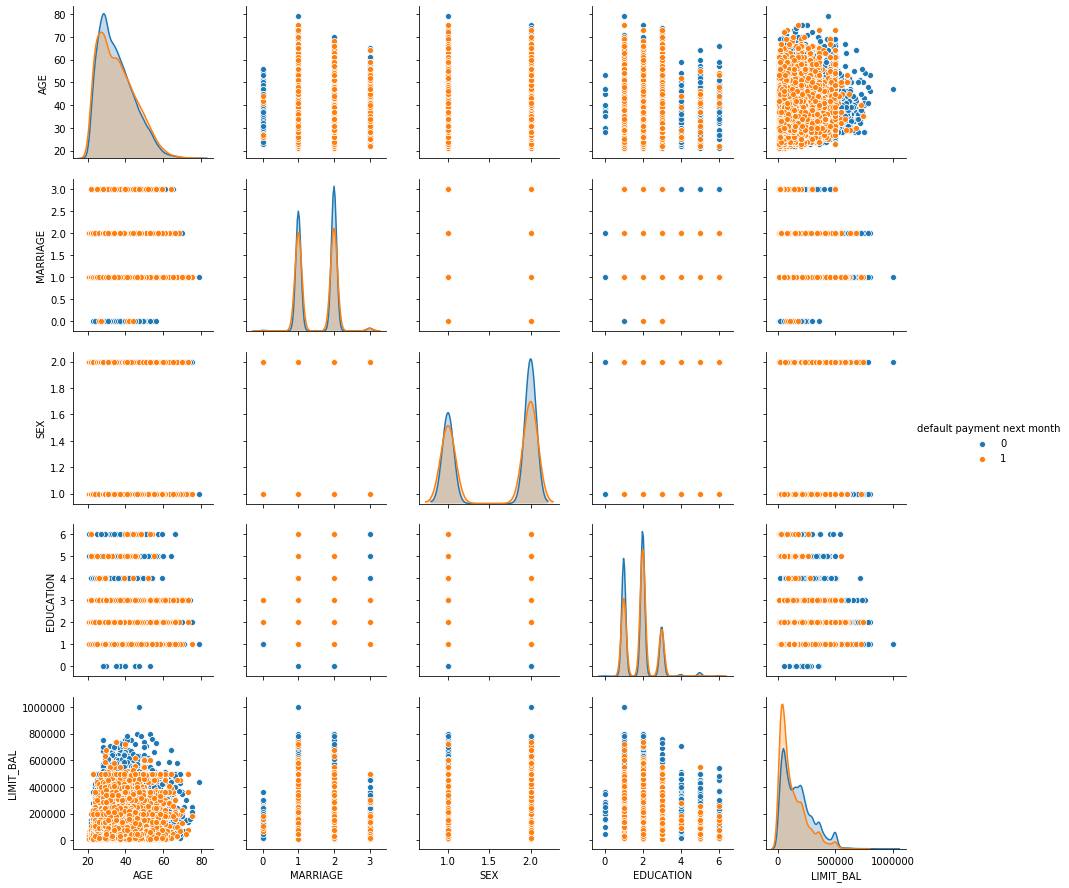

In [25]:
sns.pairplot(dataset, hue = 'default payment next month', vars = ['AGE', 'MARRIAGE', 'SEX', 'EDUCATION', 'LIMIT_BAL'] )

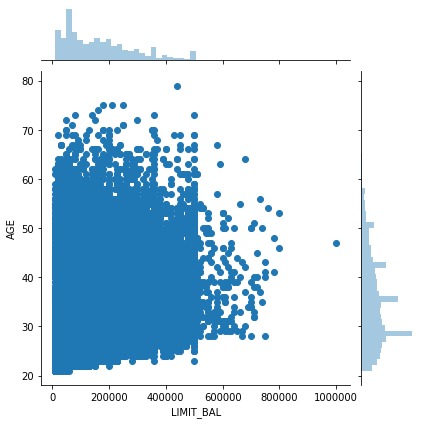

In [26]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset)

Distribution of LIMIT BALANCE and AGE 

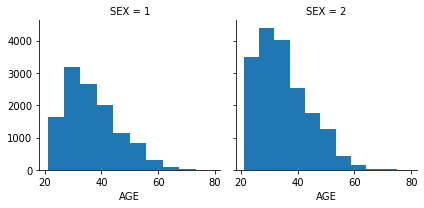

In [27]:
g = sns.FacetGrid(data=dataset,col='SEX')
g.map(plt.hist,'AGE')

Distribution of Male and Female according to their age

# STEP 4. Finding Correlation

In [28]:
X = dataset.drop(['default payment next month'],axis=1) #Drop Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. 
y = dataset['default payment next month']

In [29]:
X.shape

(30000, 24)

In [30]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [31]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

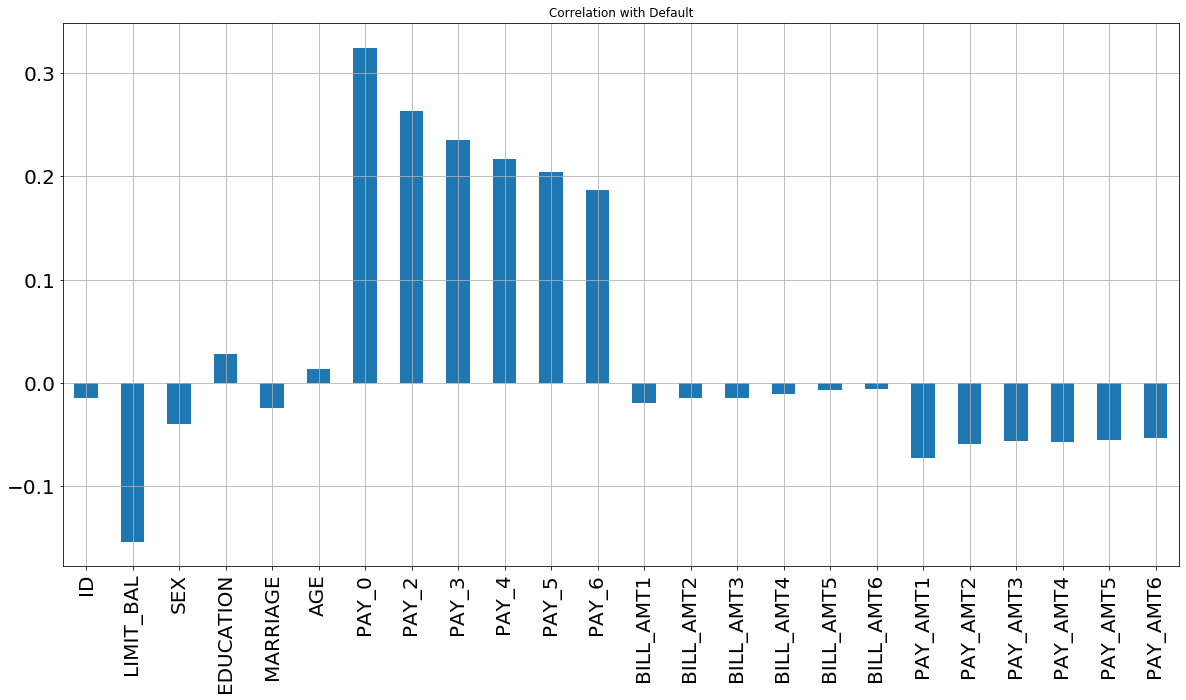

In [32]:
X.corrwith(dataset['default payment next month']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

In [33]:
dataset2 = dataset.drop(columns = ['default payment next month'])

In [34]:
dataset2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [35]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

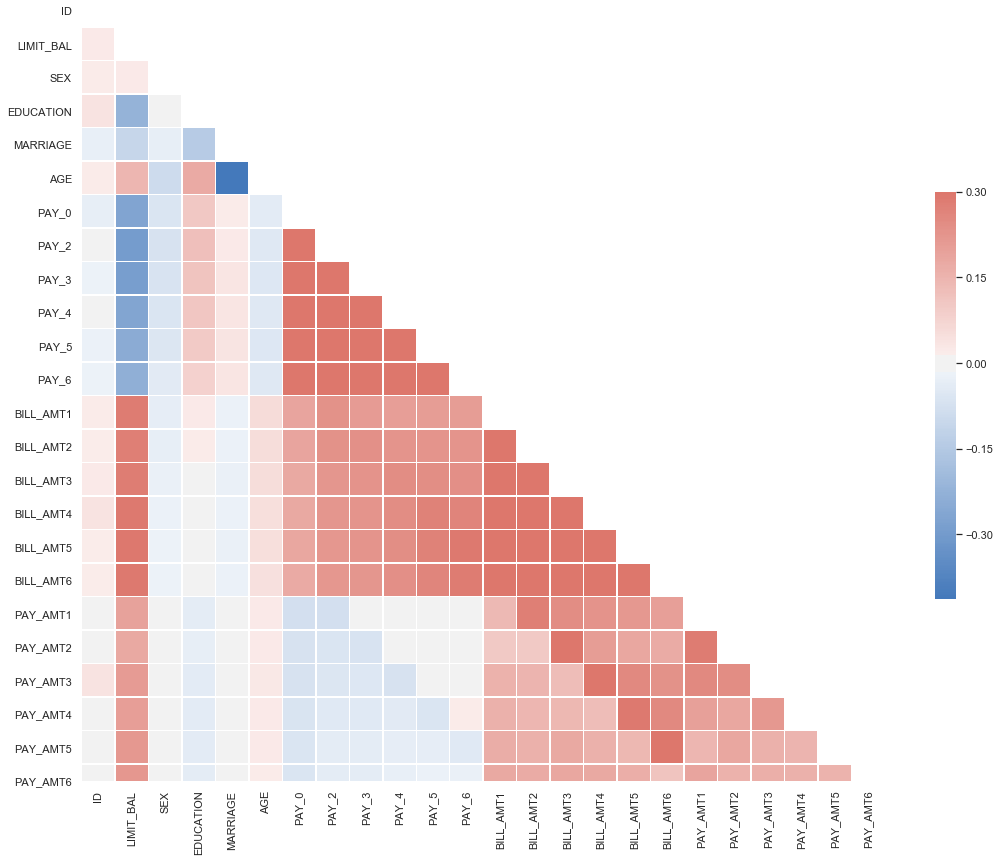

In [36]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)
# A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET



The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [37]:
X = dataset.iloc[:, 1:24].values
y = dataset.iloc[:, 24].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# STEP 6: Normalizing the data : Feature Scaling

Feature scaling through standardization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized,



In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


# STEP 7: Applying Machine Learning Models

1.LogisticRegression

In [40]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)

start =time()
logistic.fit(X_train_scaled, y_train)
end=time()
train_time_logistic =end -start

F:\life\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# Predicting the Test set results
y_pred = logistic.predict(X_test_scaled)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [43]:
cm

array([[4606,   97],
       [ 987,  310]], dtype=int64)

In [44]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.36385,0.609194


2.Support Vector Machine (SVM)

In [45]:
# Fitting Support Vector Machine (SVM) to the Training set
from sklearn.svm import SVC 

svc_model = SVC(kernel='rbf', gamma=0.1,C=100)

start = time()
svc_model.fit(X_train_scaled, y_train)
end=time()
train_time_svc=end-start

In [46]:

# Predicting the Test set results
y_pred_svc = svc_model.predict(X_test_scaled)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[4249,  454],
       [ 833,  464]], dtype=int64)

In [48]:

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

model_results = pd.DataFrame([['SVC ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.363850,0.609194
1,SVC,0.785500,0.505447,0.357749,0.418962,0.630607


3.KNNeighborsClassifier

In [49]:
# Fitting KNNeighborsClassifier  to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)

start = time()
knn.fit(X_train_scaled, y_train)
end=time()

train_time_knn=end-start

In [50]:
# Predicting the Test set results
y_pred_g = knn.predict(X_test_scaled)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_g)
cm

array([[4352,  351],
       [ 854,  443]], dtype=int64)

In [52]:
# Model eveluation 
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_g)
acc = accuracy_score(y_test, y_pred_g)
prec = precision_score(y_test, y_pred_g)
rec = recall_score(y_test, y_pred_g)
f1 = f1_score(y_test, y_pred_g)

model_results = pd.DataFrame([['KNN 7', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.363850,0.609194
1,SVC,0.785500,0.505447,0.357749,0.418962,0.630607
2,KNN 7,0.799167,0.557935,0.341557,0.423721,0.633462


# 4.Decision Tree Classification

In [53]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(max_depth = 3,criterion = 'entropy', random_state = 0)

start = time()
Decision_Tree.fit(X_train_scaled, y_train)
end = time()
train_time_DT=end-start

In [54]:
# Predicting the Test set results
y_pred_DT = Decision_Tree.predict(X_test_scaled)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[4539,  164],
       [ 859,  438]], dtype=int64)

In [56]:
# Model eveluation 
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_DT)
acc = accuracy_score(y_test, y_pred_DT)
prec = precision_score(y_test, y_pred_DT)
rec = recall_score(y_test, y_pred_DT)
f1 = f1_score(y_test, y_pred_DT)

model_results = pd.DataFrame([['Decision_Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.363850,0.609194
1,SVC,0.785500,0.505447,0.357749,0.418962,0.630607
2,KNN 7,0.799167,0.557935,0.341557,0.423721,0.633462
3,Decision_Tree,0.829500,0.727575,0.337702,0.461295,0.651416


# 5. Random Forest Tree
    

Applying Random Forest with 100 trees and criterion entropy



In [57]:
# train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 47, 
                                    criterion = 'entropy',n_estimators=100)
start = time()
classifier.fit(X_train_scaled, y_train)
end=time()
train_time_r100=end-start

In [58]:
# Predicting the Test set results
y_pred_r = classifier.predict(X_test_scaled)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_r)
cm

array([[4452,  251],
       [ 817,  480]], dtype=int64)

In [60]:
#model eveluation
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_r)
acc = accuracy_score(y_test, y_pred_r)
prec = precision_score(y_test, y_pred_r)
rec = recall_score(y_test, y_pred_r)
f1 = f1_score(y_test, y_pred_r)
model_results = pd.DataFrame([['Random_forest_ent100 ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.363850,0.609194
1,SVC,0.785500,0.505447,0.357749,0.418962,0.630607
2,KNN 7,0.799167,0.557935,0.341557,0.423721,0.633462
3,Decision_Tree,0.829500,0.727575,0.337702,0.461295,0.651416
4,Random_forest_ent100,0.822000,0.656635,0.370085,0.473373,0.658357


6.AdaBoostClassifier

In [61]:
from sklearn.ensemble  import AdaBoostClassifier
adaboost =AdaBoostClassifier()

start = time()
adaboost.fit(X_train_scaled, y_train)
end = time()
train_time_ada=end-start

In [62]:
y_pred_ada= adaboost.predict(X_test_scaled)

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ada)
cm

array([[4532,  171],
       [ 873,  424]], dtype=int64)

In [64]:
#model eveluation
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_ada)
acc = accuracy_score(y_test, y_pred_ada)
prec = precision_score(y_test, y_pred_ada)
rec = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)
model_results = pd.DataFrame([['Adaboost ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,0.819333,0.761671,0.239013,0.363850,0.609194
1,SVC,0.785500,0.505447,0.357749,0.418962,0.630607
2,KNN 7,0.799167,0.557935,0.341557,0.423721,0.633462
3,Decision_Tree,0.829500,0.727575,0.337702,0.461295,0.651416
4,Random_forest_ent100,0.822000,0.656635,0.370085,0.473373,0.658357
5,Adaboost,0.826000,0.712605,0.326908,0.448203,0.645274


7. XGBoost 

In [65]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
start = time()

xgb_classifier.fit(X_train_scaled, y_train,verbose=True)
end=time()
train_time_xgb=end-start

In [66]:
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

In [67]:
# apply confustion matrix
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm

array([[4494,  209],
       [ 812,  485]], dtype=int64)

In [68]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

model_results = pd.DataFrame([['XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

,Accuracy,F1 Score,Model,Precision,ROC,Recall
0,0.819333,0.363850,Logistic,0.761671,0.609194,0.239013
1,0.785500,0.418962,SVC,0.505447,0.630607,0.357749
2,0.799167,0.423721,KNN 7,0.557935,0.633462,0.341557
3,0.829500,0.461295,Decision_Tree,0.727575,0.651416,0.337702
4,0.822000,0.473373,Random_forest_ent100,0.656635,0.658357,0.370085
5,0.826000,0.448203,Adaboost,0.712605,0.645274,0.326908
0,0.829833,0.487192,XGboost,0.698847,0.664750,0.373940


# 
8.Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

In [69]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=1000)
start = time()
sgd.fit(X_train_scaled, y_train)
end=time()
train_time_sgd=end-start

In [70]:
y_pred_sgd = sgd.predict(X_test_scaled)

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
cm

array([[4559,  144],
       [ 980,  317]], dtype=int64)

In [72]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

model_results = pd.DataFrame([['SGD 1000 iter', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

,Accuracy,F1 Score,Model,Precision,ROC,Recall
0,0.819333,0.363850,Logistic,0.761671,0.609194,0.239013
1,0.785500,0.418962,SVC,0.505447,0.630607,0.357749
2,0.799167,0.423721,KNN 7,0.557935,0.633462,0.341557
3,0.829500,0.461295,Decision_Tree,0.727575,0.651416,0.337702
4,0.822000,0.473373,Random_forest_ent100,0.656635,0.658357,0.370085
5,0.826000,0.448203,Adaboost,0.712605,0.645274,0.326908
0,0.829833,0.487192,XGboost,0.698847,0.664750,0.373940
0,0.812667,0.360637,SGD 1000 iter,0.687636,0.606896,0.244410


# 9. GradientBoostingClassifier

In [73]:
from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
start = time()
gboost.fit(X_train_scaled, y_train)
end=time()
train_time_g=end-start

In [74]:
y_pred_gboost = gboost.predict(X_test_scaled)

In [75]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gboost)
cm

array([[4485,  218],
       [ 814,  483]], dtype=int64)

In [76]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_gboost)
acc = accuracy_score(y_test, y_pred_gboost)
prec = precision_score(y_test, y_pred_gboost)
rec = recall_score(y_test, y_pred_gboost)
f1 = f1_score(y_test, y_pred_gboost)

model_results = pd.DataFrame([['Gboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

,Accuracy,F1 Score,Model,Precision,ROC,Recall
0,0.819333,0.363850,Logistic,0.761671,0.609194,0.239013
1,0.785500,0.418962,SVC,0.505447,0.630607,0.357749
2,0.799167,0.423721,KNN 7,0.557935,0.633462,0.341557
3,0.829500,0.461295,Decision_Tree,0.727575,0.651416,0.337702
4,0.822000,0.473373,Random_forest_ent100,0.656635,0.658357,0.370085
5,0.826000,0.448203,Adaboost,0.712605,0.645274,0.326908
0,0.829833,0.487192,XGboost,0.698847,0.664750,0.373940
0,0.812667,0.360637,SGD 1000 iter,0.687636,0.606896,0.244410
0,0.828000,0.483483,Gboost,0.689016,0.663022,0.372398


# STEP 8 : ANALYZING AND COMPARING TRAINING TIME OF MACHINE LEARNING MODELS

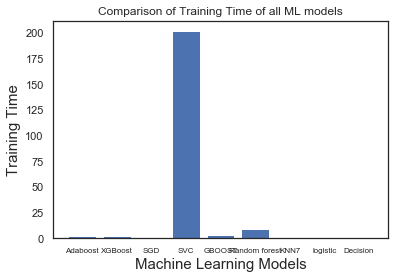

In [88]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adaboost','XGBoost','SGD', 'SVC', 'GBOOST', 'Random forest', 'KNN7','logistic','Decision']
Train_Time = [
    train_time_ada,
    train_time_xgb,
    train_time_sgd,
    train_time_svc,
    train_time_g,
    train_time_r100,
    train_time_DT,
    train_time_logistic,
    train_time_knn
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=8, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

As from the above graph it is evident that Adaboost and XGboost have taken very less time to train in comparison to other models where as SVC has taken maximum time the reason may be we have passed some crucial parameters to SVC.



# Predicting a single new observation

In [78]:
# •	LIMIT_BAL: 20000 ,90000
# •	SEX: Gender 2,    2
# •	EDUCATION: 2,     2
# •	MARRIAGE:1     2
# •	AGE: 24,,    34
# •	PAY_0:2 ,  0
# •	PAY_2: 2,   0
# •	PAY_3:-1,   0
# •	PAY_4: -1,  0
# •	PAY_5:-2,   0
# •	PAY_6: -2,  0
# •	BILL_AMT:3,913 , 29239
# •	BILL_AMT2:3,102, 14027
# •	BILL_AMT3: 6,89, 13559
# •	BILL_AMT4: 0, , 14331
# •	BILL_AMT5: 0,,  14948
# •	BILL_AMT6: 0,   15549
# •	PAY_AMT1: 0,    1518 
# •	PAY_AMT2:689,    1500
# •	PAY_AMT3: 0,     1000
# •	PAY_AMT4: 0,     1000
# •	PAY_AMT5: 0,     1000
# •	PAY_AMT6: 0      5000


# •	default.payment.next.month: Default payment (1=yes, 0=no)


In [81]:
# Predicting the Test set results
new_prediction = Decision_Tree.predict(sc.transform(np.array([[20000, 2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0]])))
new_prediction = (new_prediction > 0.5)

In [82]:
new_prediction

array([ True])

In [86]:
new_prediction_1 = Decision_Tree.predict(sc.transform(np.array([[90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000]])))
new_prediction_1= (new_prediction_1 > 0.5)


In [87]:
new_prediction_1

array([False])

In [ ]:
# XGBOOST

In [89]:
new_predict_xgb = xgb_classifier.predict(sc.transform(np.array([[20000, 2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0]])))

new_prediction = (new_predict_xgb > 0.5)
new_prediction

array([ True])

In [ ]:
new_predict_xgb = xgb_classifier.predict(sc.transform(np.array([[90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000]])))

new_prediction = (new_predict_xgb > 0.5)
new_prediction

In [ ]:
#  AdaBoost 

In [91]:
new_predict_xgb = adaboost.predict(sc.transform(np.array([[20000, 2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0]])))

new_prediction = (new_predict_xgb > 0.5)
new_prediction

array([ True])

In [92]:
new_predict_ada = adaboost.predict(sc.transform(np.array([[90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000]])))

new_prediction = (new_predict_ada > 0.5)
new_prediction

array([False])

# conclousion


 Decision tree, XGBoost, Adaboost three classifiers are top accuracy and # Predicting a single new observation
    True = defalut payment ,False= not defalut payment , the above predicted  values are correct 
    
    more accuracy and best parameters , use model tunning like Random serch CV, grid search CV